# Matplotlib for Publication - Exercise 1

Here you will play with a cleaned and curated version of a recent release of the NASA exoplanet database, featuring >5000 exoplanets, that was published on the Kaggle. Some of the units have been changed from the original document so that you can focus on plotting (e.g. most gas giant planets had their masses and radii reported in Jupiter units, but I've converted all planet masses and radii to Earth units). 

Here are the column names and descriptions:
- **name**: exoplanet name. The convention is the star's catalog name followed by a lowercase letter, starting with b and progressing alphabetically in order of discovery 
- **distance**: distance to the planetary system in light years
- **star_mag**: apparent brightness of the star as seen from Earth in the astronomical magnitude system (don't worry about this one too much, the units are pretty awful to work with). Higher numbers indicate fainter stars and the system is logarithmic; an *increase* of 5 magnitudes corresponds to a *decrease* in brightness by a factor of 100.
- **planet_type**: values include "Gas Giant" (like Jupiter or Saturn), "Neptune-like" (sort of a mini gas giant or ice giant), "Super Earth" (thought to be rocky but up to a few times larger than Earth), and "Terrestrial" (comparable to or smaller than Earth)
- **discovery_yr**: year that the discovery of the planet was published
- **mass_ME**: mass of the planet in units of Earth masses (1 Earth mass = $5.972 \times 10^{24}$ kg)
- **radius_RE**: radius of the planet in units of Earth masses (1 Earth radius = 6371 km)
- **orbital_radius_AU**: the exoplanet's orbital semi-major axis in units of the average distance between the Earth and Sun (1 Astronomical Unit, or AU)
- **orbital_period_yr**: the time taken for the exoplanet to orbit its star in units of Earth's year
- **eccentricity**: measure of the deviation of the exoplanet's orbit from a perfect circle. Values range from 0 to 1 where 0 = perfect circle and 1 indicates a parabolic (just barely unbound) orbit.
- **detection_method**: principle method used to detect the planet. See [this educational slideshow by NASA](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/) or [this Wikipedia page](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets) for more details.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

exos = np.genfromtxt('exoplanets_5250_EarthUnits.csv',delimiter=',',dtype=None,
                     names=True, encoding='ascii')

#take a quick peak at the data so we know how to call it
print(exos.dtype.names)
print(exos[np.where(exos['name']=='55 Cancri e')])
print(exos[705])

('name', 'distance', 'star_mag', 'planet_type', 'discovery_yr', 'mass_ME', 'radius_RE', 'orbital_radius_AU', 'orbital_period_yr', 'eccentricity', 'detection_method')
[('55 Cancri e', 41, 5.95084, 'Super Earth', 2004, 7.99, 1.875, 0.01544, 0.0019165, 0.05, 'Radial Velocity')]
('HD 160691 e', 51, 5.12, 'Gas Giant', 2006, 2226., nan, 0.934, 0.84298426, 0.07, 'Radial Velocity')


1. First, see what you get if you plot the exoplanet mass against the orbital radius. (Tip: you may want to use a log-log scale). Label the axes $a\;[\mathrm{AU}]$ for orbital semi-major axis and $M\;[\mathrm{M}_{\oplus}]$ or $M\;[\mathrm{M}_{\mathrm{E}}]$ for mass with the correct LaTeX formatting\*. You can find the LaTeX code for the crossed circle $\oplus$ at https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols under the binary operators. 

\*Note: Some astronomers use the crossed circle $\oplus$, the astronomical/astrological symbol for Earth, while others just use a subscript capital E. I prefer the former because as a symbol, it's used for fewer other purposes (the only other use is as the elementwise matrix addition operator), but the E may be more intuitive and is often used by astronomers who publish to broader-based journals like *Nature* or *Science*.

Text(0, 0.5, '$M\\;[\\mathrm{M}_{\\oplus}]$')

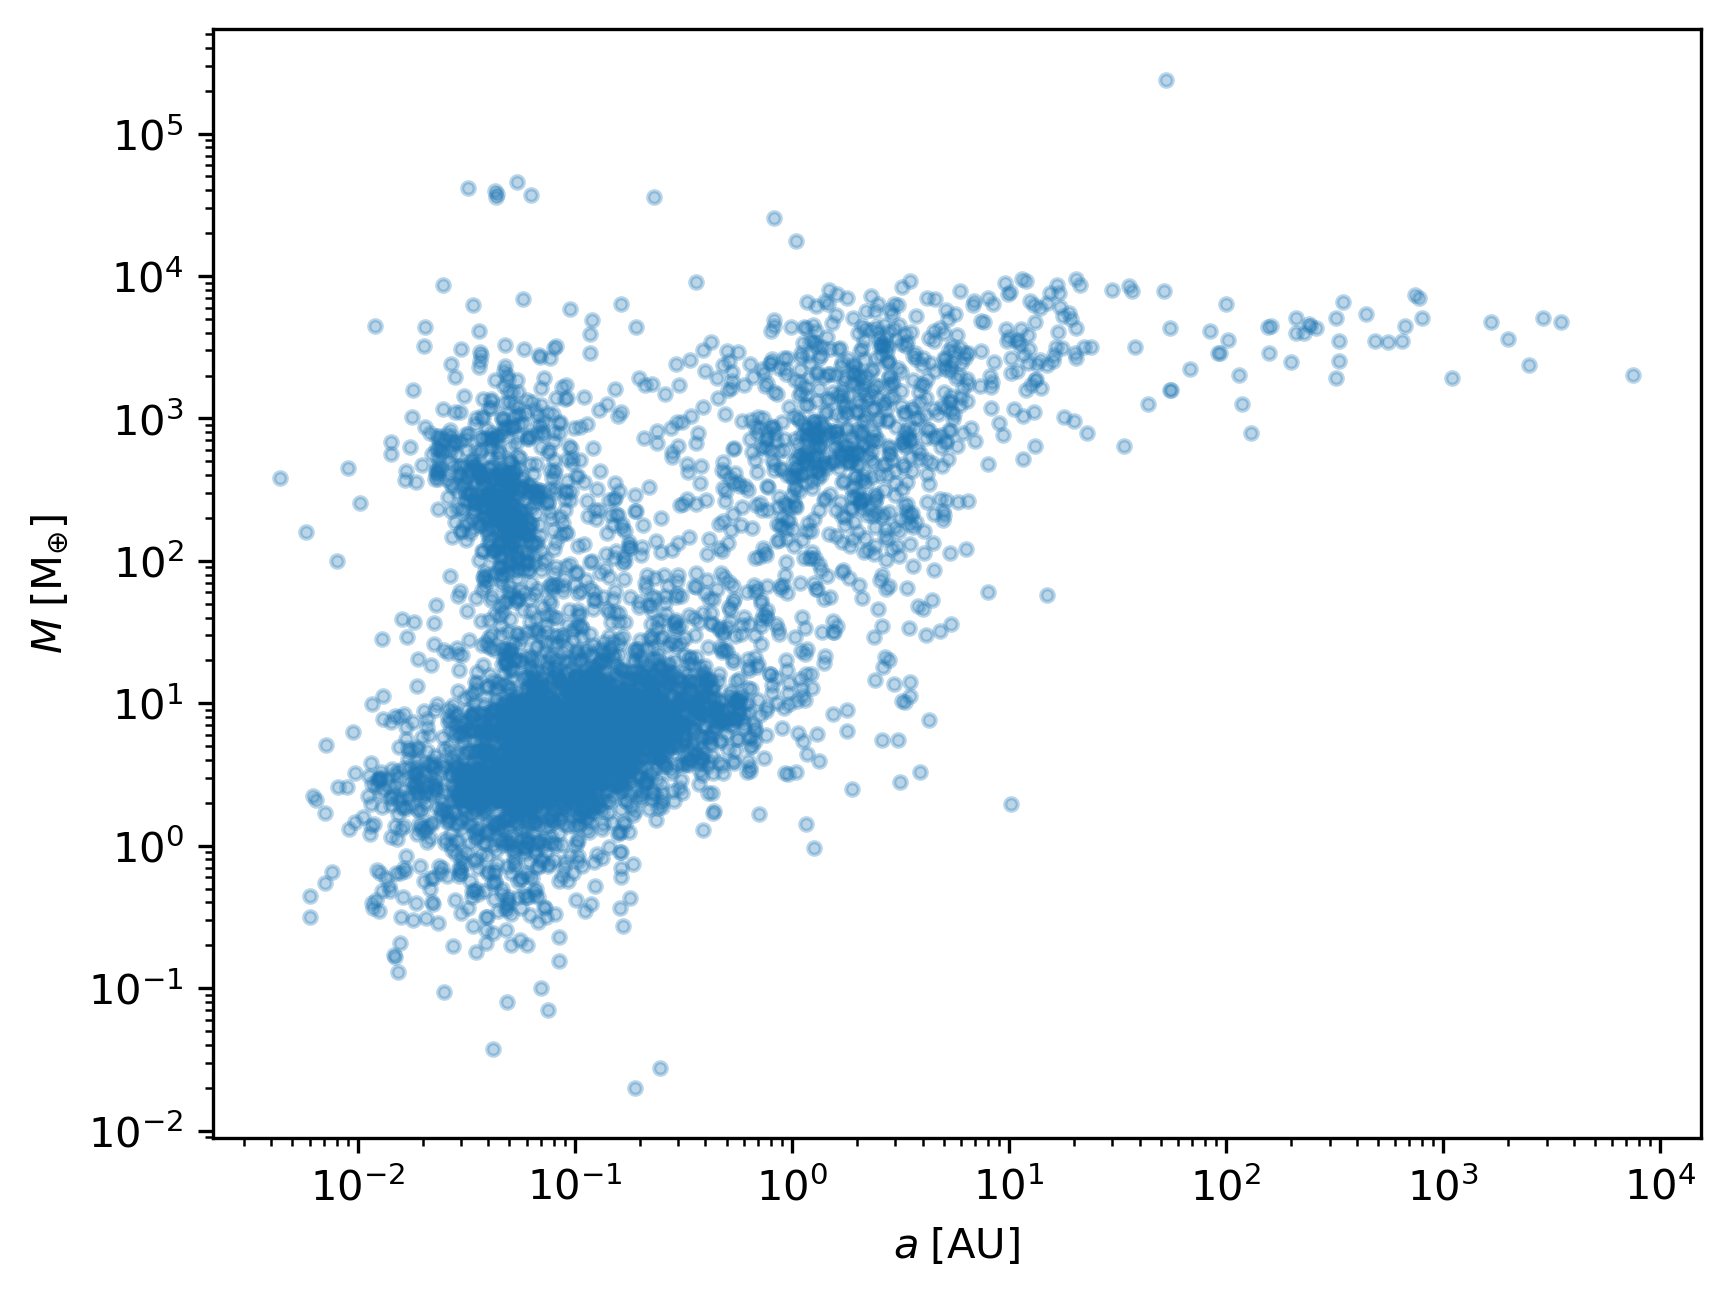

In [7]:
fig,ax = plt.subplots(dpi=300)
ax.loglog(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], '.', alpha=0.3)
ax.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')

If you just did a log-log plot, you can probably make out 3 concentrations, but the points probably look a bit dense. Try setting the alpha kwarg of plt.loglog() to a value between 0 and 1.

3. Try recreating the plot from part 1 as a hexbin plot (hint: log scales for both axes and binning are available in the kwargs). Compare the default binning to log-scaled binning, and the latter to the translucent log-log scatter plot above. Which is best if you want to emphasize that...
    - ...there are apparently 3 main population groups?
    - ...the most common type of planet seems to be Super Earths (a few to ~10 times the mass of Earth)?
    - ...there is a mass - orbital-radius sensitivity limit that is only broken at large orbital radii by very large planets that we can directly image? (In other words, you want the outliers to be prominent.)
    
    There are no "wrong" answers, but there are usually better and worse answers.

Text(0, 0.5, '$M\\;[\\mathrm{M}_{\\oplus}]$')

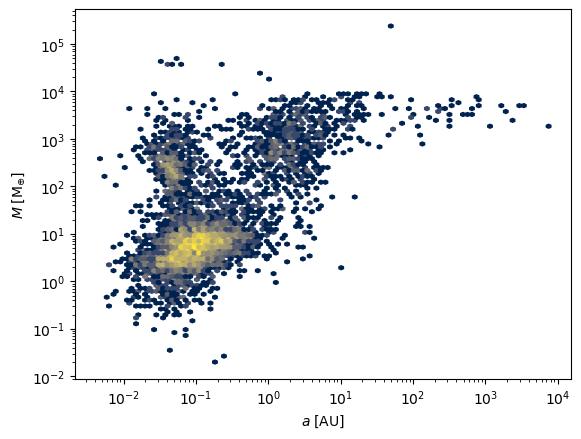

In [104]:
import matplotlib as mpl
plt.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log', bins='log',
           cmap = mpl.colormaps['cividis'])
plt.xlabel(r'$a\;[\mathrm{AU}]$')
plt.ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')

3. Use the given dictionary variable to plot the major Solar System planets (and Pluto for perspective) on the same figure using distinct markers. Now re-evaluate whether the hexbin or scatter plot is better (you might consider plotting them side-by-side or one atop the other in subplots).

    *Expert mode:* try plotting the attached PNG image on Earth at earth's location on the plot using OffsetImage and AnnotationBox from `matplotlib.offsetbox`, and `plt.imread()`. Make sure it's recognizable, but doesn't totally cover Venus or too much of the exoplanet data.

In [10]:
solsys = {'name': np.array(['Mercury','Venus','Earth','Mars',
                            'Jupiter','Saturn','Uranus','Neptune','Pluto']),
         'planet_type': np.array(['Terrestrial','Terrestrial','Terrestrial','Terrestrial',
                                  'Gas Giant','Gas Giant','Neptune-like','Neptune-like', 'Ice Dwarf']), 
         'mass_ME': np.array([0.0553,0.815,1.0,0.107, 317.8,95.2,14.5,17.1, 0.0022]), 
         'radius_RE': np.array([0.383,0.949,1.0,0.532, 11.21,9.45,4.01,3.88, 0.187]),
         'orbital_radius_AU': np.array([0.387,0.723,1.0,1.52, 5.20,9.57,19.17,30.18, 39.48]),
         'orbital_period_yr': np.array([0.241,0.615,1.0,1.88, 11.9,29.4,83.7,163.7, 247.9]),
         'eccentricity': np.array([0.206,0.007,0.017,0.094, 0.049,0.052,0.047,0.010, 0.244])}

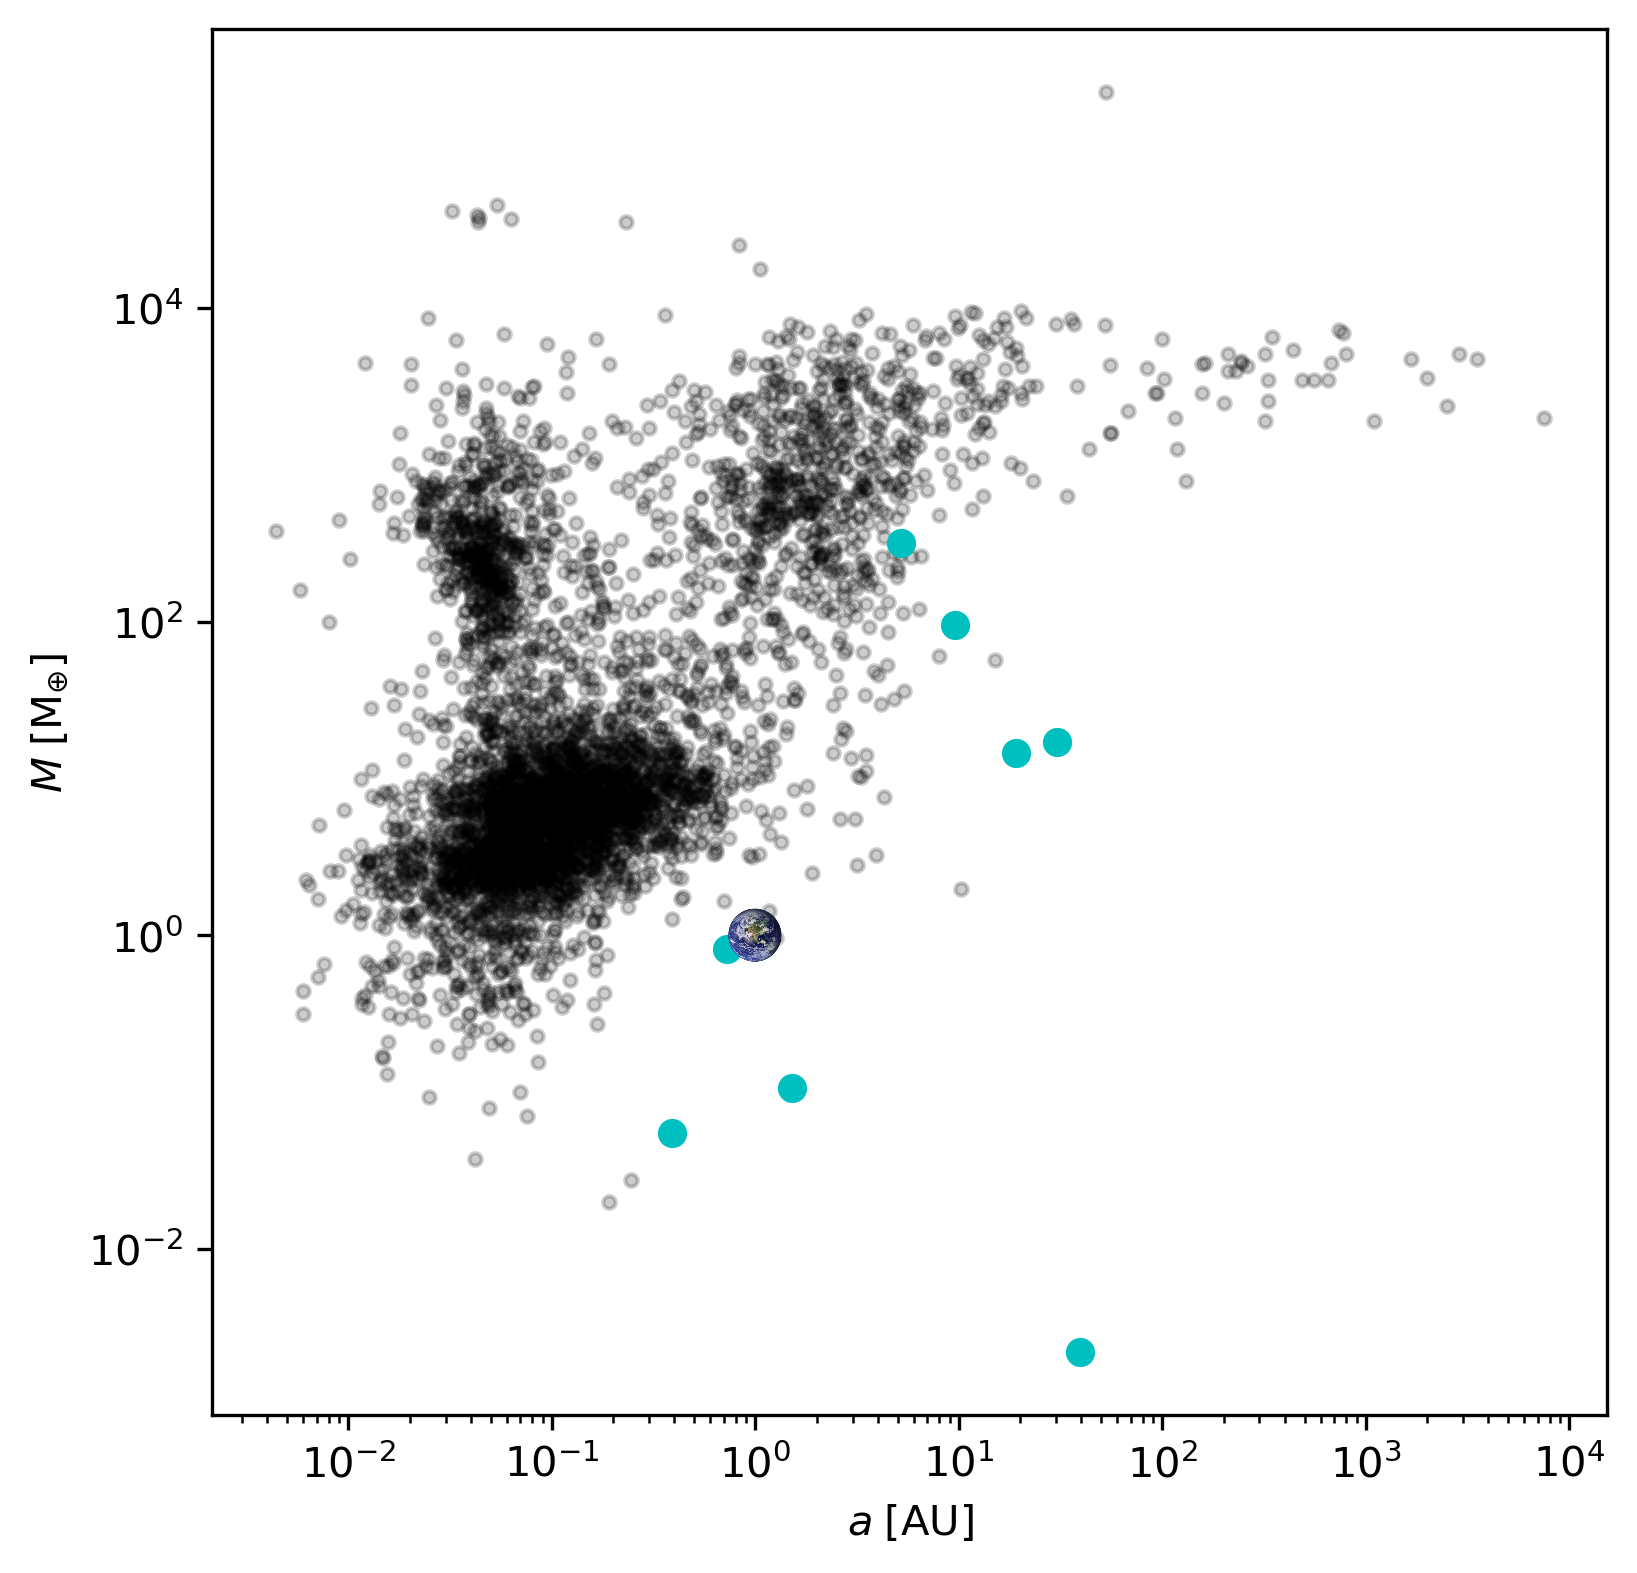

In [125]:
fig,ax = plt.subplots(dpi=300, figsize=(6,6))
ax.loglog(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], '.', alpha=0.2, color='k')
ax.loglog(solsys['orbital_radius_AU'],solsys['mass_ME'],'co')
ax.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')

icon = plt.imread('Earth.png')
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#The OffsetBox is a simple container artist.
#The child artists are meant to be drawn at a relative position to its #parent.
imagebox = OffsetImage(icon, zoom = 0.03)
#Annotation box for solar pv logo
#Container for the imagebox referring to a specific position *xy*.
ab = AnnotationBbox(imagebox, (1., 1.), frameon = False)
ax.add_artist(ab)

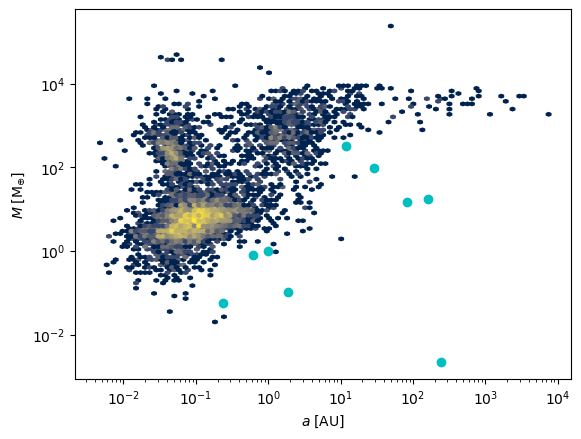

In [121]:
plt.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log', bins='log',
           cmap = mpl.colormaps['cividis'])
plt.xlabel(r'$a\;[\mathrm{AU}]$')
plt.ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
#counts = hexbin.get_array()
# xbins = 10 ** np.linspace(np.log10(min(exos['orbital_period_yr'][~np.isnan(exos['mass_ME'])])),
#                           np.log10(max(exos['orbital_period_yr'][~np.isnan(exos['mass_ME'])])),
#                           hexbin.get_array().shape[0] + 1)
# ybins = 10 ** np.linspace(np.log10(min(exos['mass_ME'][~np.isnan(exos['mass_ME'])])),
#                           np.log10(max(exos['mass_ME'][~np.isnan(exos['mass_ME'])])),
#                           hexbin.get_array().shape[1] + 1)
plt.loglog(solsys['orbital_period_yr'],solsys['mass_ME'],'co')
#print(hexbin.get_array().shape)

4. You might have noticed in the previous couple of plots that at least one of the axes switched to showing every other power of 10 and did away with the minor tickmarks. That's not ideal. Use tick locators to make sure every power of ten is shown.
    
    *Hard mode:* show minor ticks at least every 2/10 of a decade. Refer to https://stackoverflow.com/questions/44078409/how-to-display-all-minor-tick-marks-on-a-semi-log-plot if you need help.

In [48]:
print(np.log10(np.min(solsys['mass_ME'])),np.log10(np.nanmax(exos['mass_ME'])))
print(np.log10(np.nanmin(exos['orbital_radius_AU'])),np.log10(np.nanmax(exos['orbital_radius_AU'])))

-2.657577319177794 5.378644960576075
-2.3565473235138126 3.8754085600770636


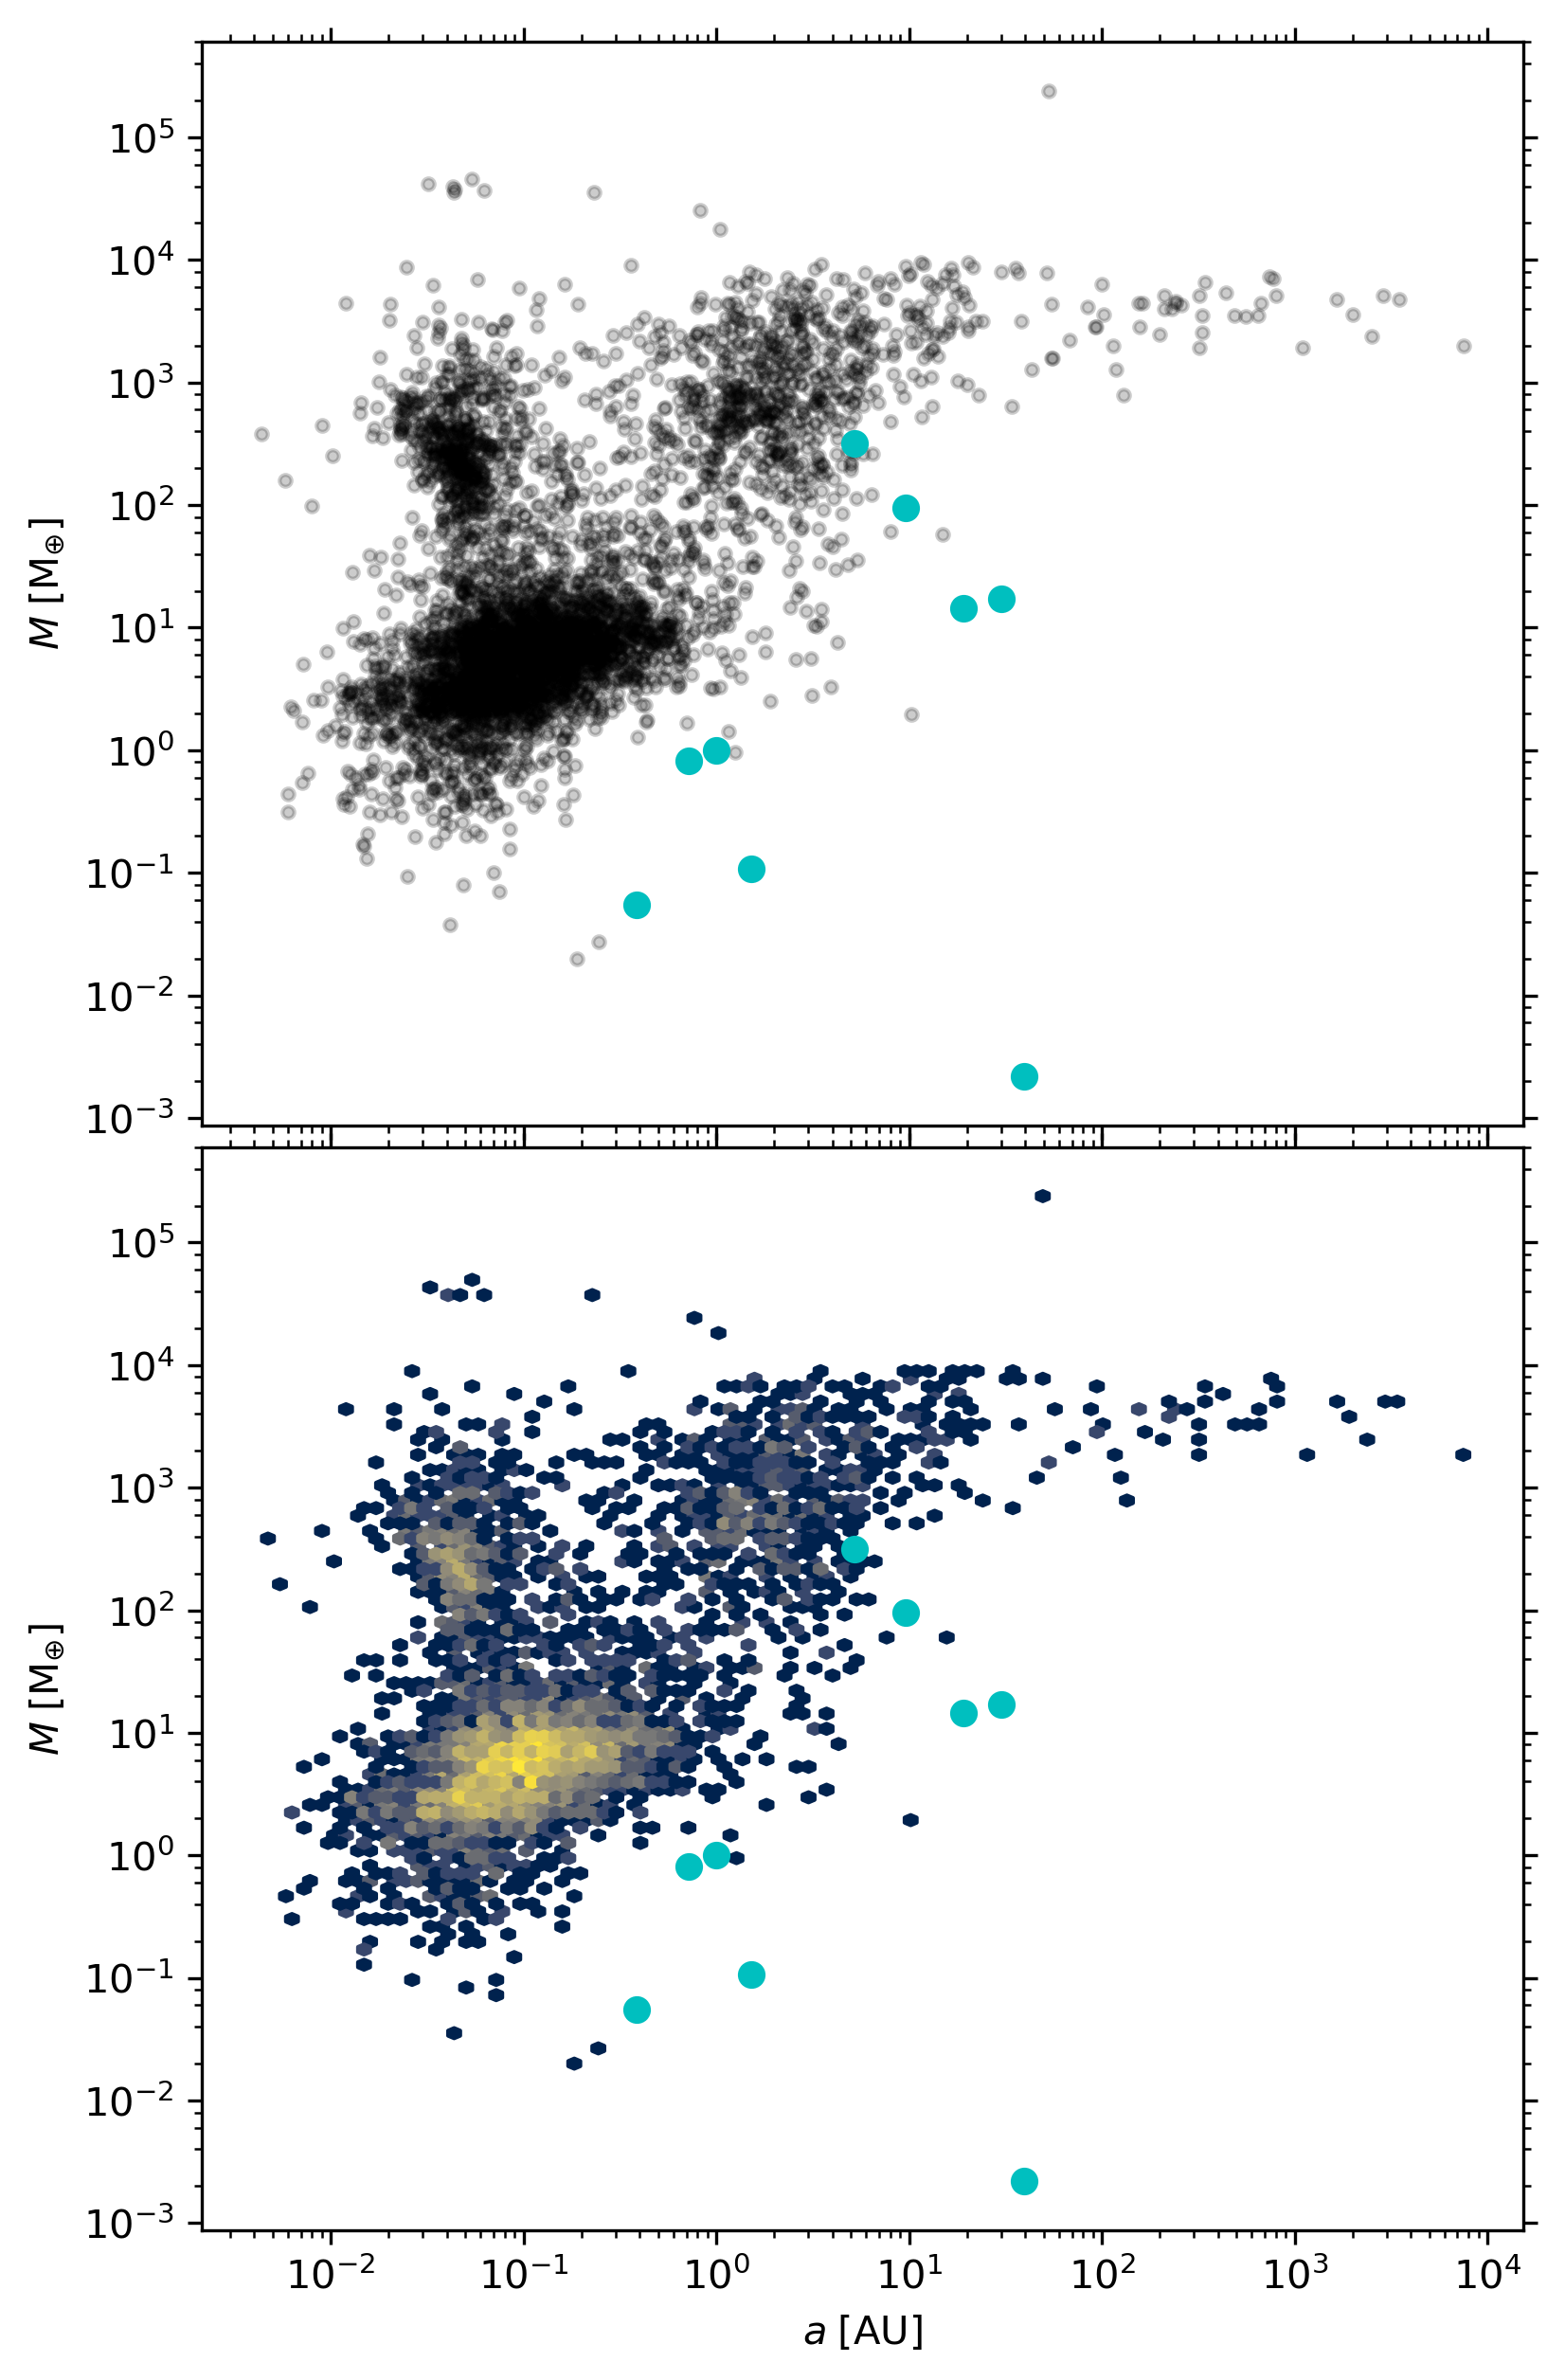

In [122]:
import matplotlib.ticker as ticks
fig,(ax0,ax1) = plt.subplots(nrows=2, dpi=300, figsize=(6,10), sharex=True)
plt.subplots_adjust(hspace=0.02)
ax0.scatter(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], c='k', marker='.', alpha=0.2)
ax0.scatter(solsys['orbital_radius_AU'],solsys['mass_ME'],c='c',marker='o')
ax0.set_xscale('log')
ax0.set_yscale('log')
#ax0.set_xlabel(r'$a\;[\mathrm{AU}]$')
#ax0.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')

ax1.hexbin(exos['orbital_radius_AU'][~np.isnan(exos['mass_ME'])],
           exos['mass_ME'][~np.isnan(exos['mass_ME'])], xscale='log', yscale='log', bins='log',
           cmap = mpl.colormaps['cividis'],zorder=0)
ax1.scatter(solsys['orbital_radius_AU'],solsys['mass_ME'],c='c',marker='o',zorder=20)
ax1.set_xlabel(r'$a\;[\mathrm{AU}]$')
for ax in [ax0,ax1]:
    #ax.xaxis.set_major_locator(ticks.FixedLocator(10.**np.arange(-3.,5.)))
    #ax.xaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=99))
    #ax.xaxis.set_minor_formatter(ticks.NullFormatter())
    ax.yaxis.set_major_locator(ticks.FixedLocator(10.**np.arange(-3.,6.)))
    ax.yaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=99))
    ax.yaxis.set_minor_formatter(ticks.NullFormatter())
    ax.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True)

5. Is that one large group at the lowest masses really just 1 population? How does the detection method affect what we see? These are questions you can visualize the answers to by color-coding the points by type and detection method, and for these it may be more insightful to use `orbital_period_yr` for the x-axes instead. Plot `mass_ME` against `orbital_period_yr` (use the symbol `$\tau$`) with `scatter()` (you will have to set the log-scaling of the x- and y-axes manually), and this time, while paying attention to color-blind friendliness,
    
    a) color-code and change the marker shapes for the points by `planet_type`, and then
    
    b) color-code the points by `detection_method`. Since the number of categories is large, merge all categories containing the word "Timing" under a category labeled "Timing", and omit "Disk Kinematics" since those exoplanets are still forming. (Tip: You may want to sort the categories with `np.unique(dtect_methds,return_counts=True)` so that you can plot categories with fewer data points closer to the top, and maybe also set the opacity of exoplanets detected via 'Transit' or 'Radial Velocity' lower than the rest)
    
    For both plots, you will probably want to use a dict of colors and/or marker-styles with the keys set by the unique values of `planet_type` and `detection_method`. You can use set operations to determine the values.

In [158]:
print(sorted(set(exos['planet_type'])))
dummy,counts = np.unique(exos['detection_method'],return_counts=True)
[print(tup,'\n') for tup in list(zip(dummy,counts))]
methds = ['Timing']
for m in set(exos['detection_method']):
       if not 'Timing' in m and not 'Disk' in m:
            methds.append(m)
print(sorted(methds)[::-1])
meth_dict=dict(zip(sorted(methds)[::-1], zip(['tab:blue','tab:orange', 'c', 'tab:red',
                                          'g', 'm', 'k'] ,
                   ['v','P','o','D','d','s', '^'])))
print(meth_dict)

['Gas Giant', 'Neptune-like', 'Super Earth', 'Terrestrial', 'Unknown']
('Astrometry', 2) 

('Direct Imaging', 62) 

('Disk Kinematics', 1) 

('Eclipse Timing Variations', 17) 

('Gravitational Microlensing', 154) 

('Orbital Brightness Modulation', 9) 

('Pulsar Timing', 7) 

('Pulsation Timing Variations', 2) 

('Radial Velocity', 1027) 

('Transit', 3945) 

('Transit Timing Variations', 24) 

['Transit', 'Timing', 'Radial Velocity', 'Orbital Brightness Modulation', 'Gravitational Microlensing', 'Direct Imaging', 'Astrometry']
{'Transit': ('tab:blue', 'v'), 'Timing': ('tab:orange', 'P'), 'Radial Velocity': ('c', 'o'), 'Orbital Brightness Modulation': ('tab:red', 'D'), 'Gravitational Microlensing': ('g', 'd'), 'Direct Imaging': ('m', 's'), 'Astrometry': ('k', '^')}


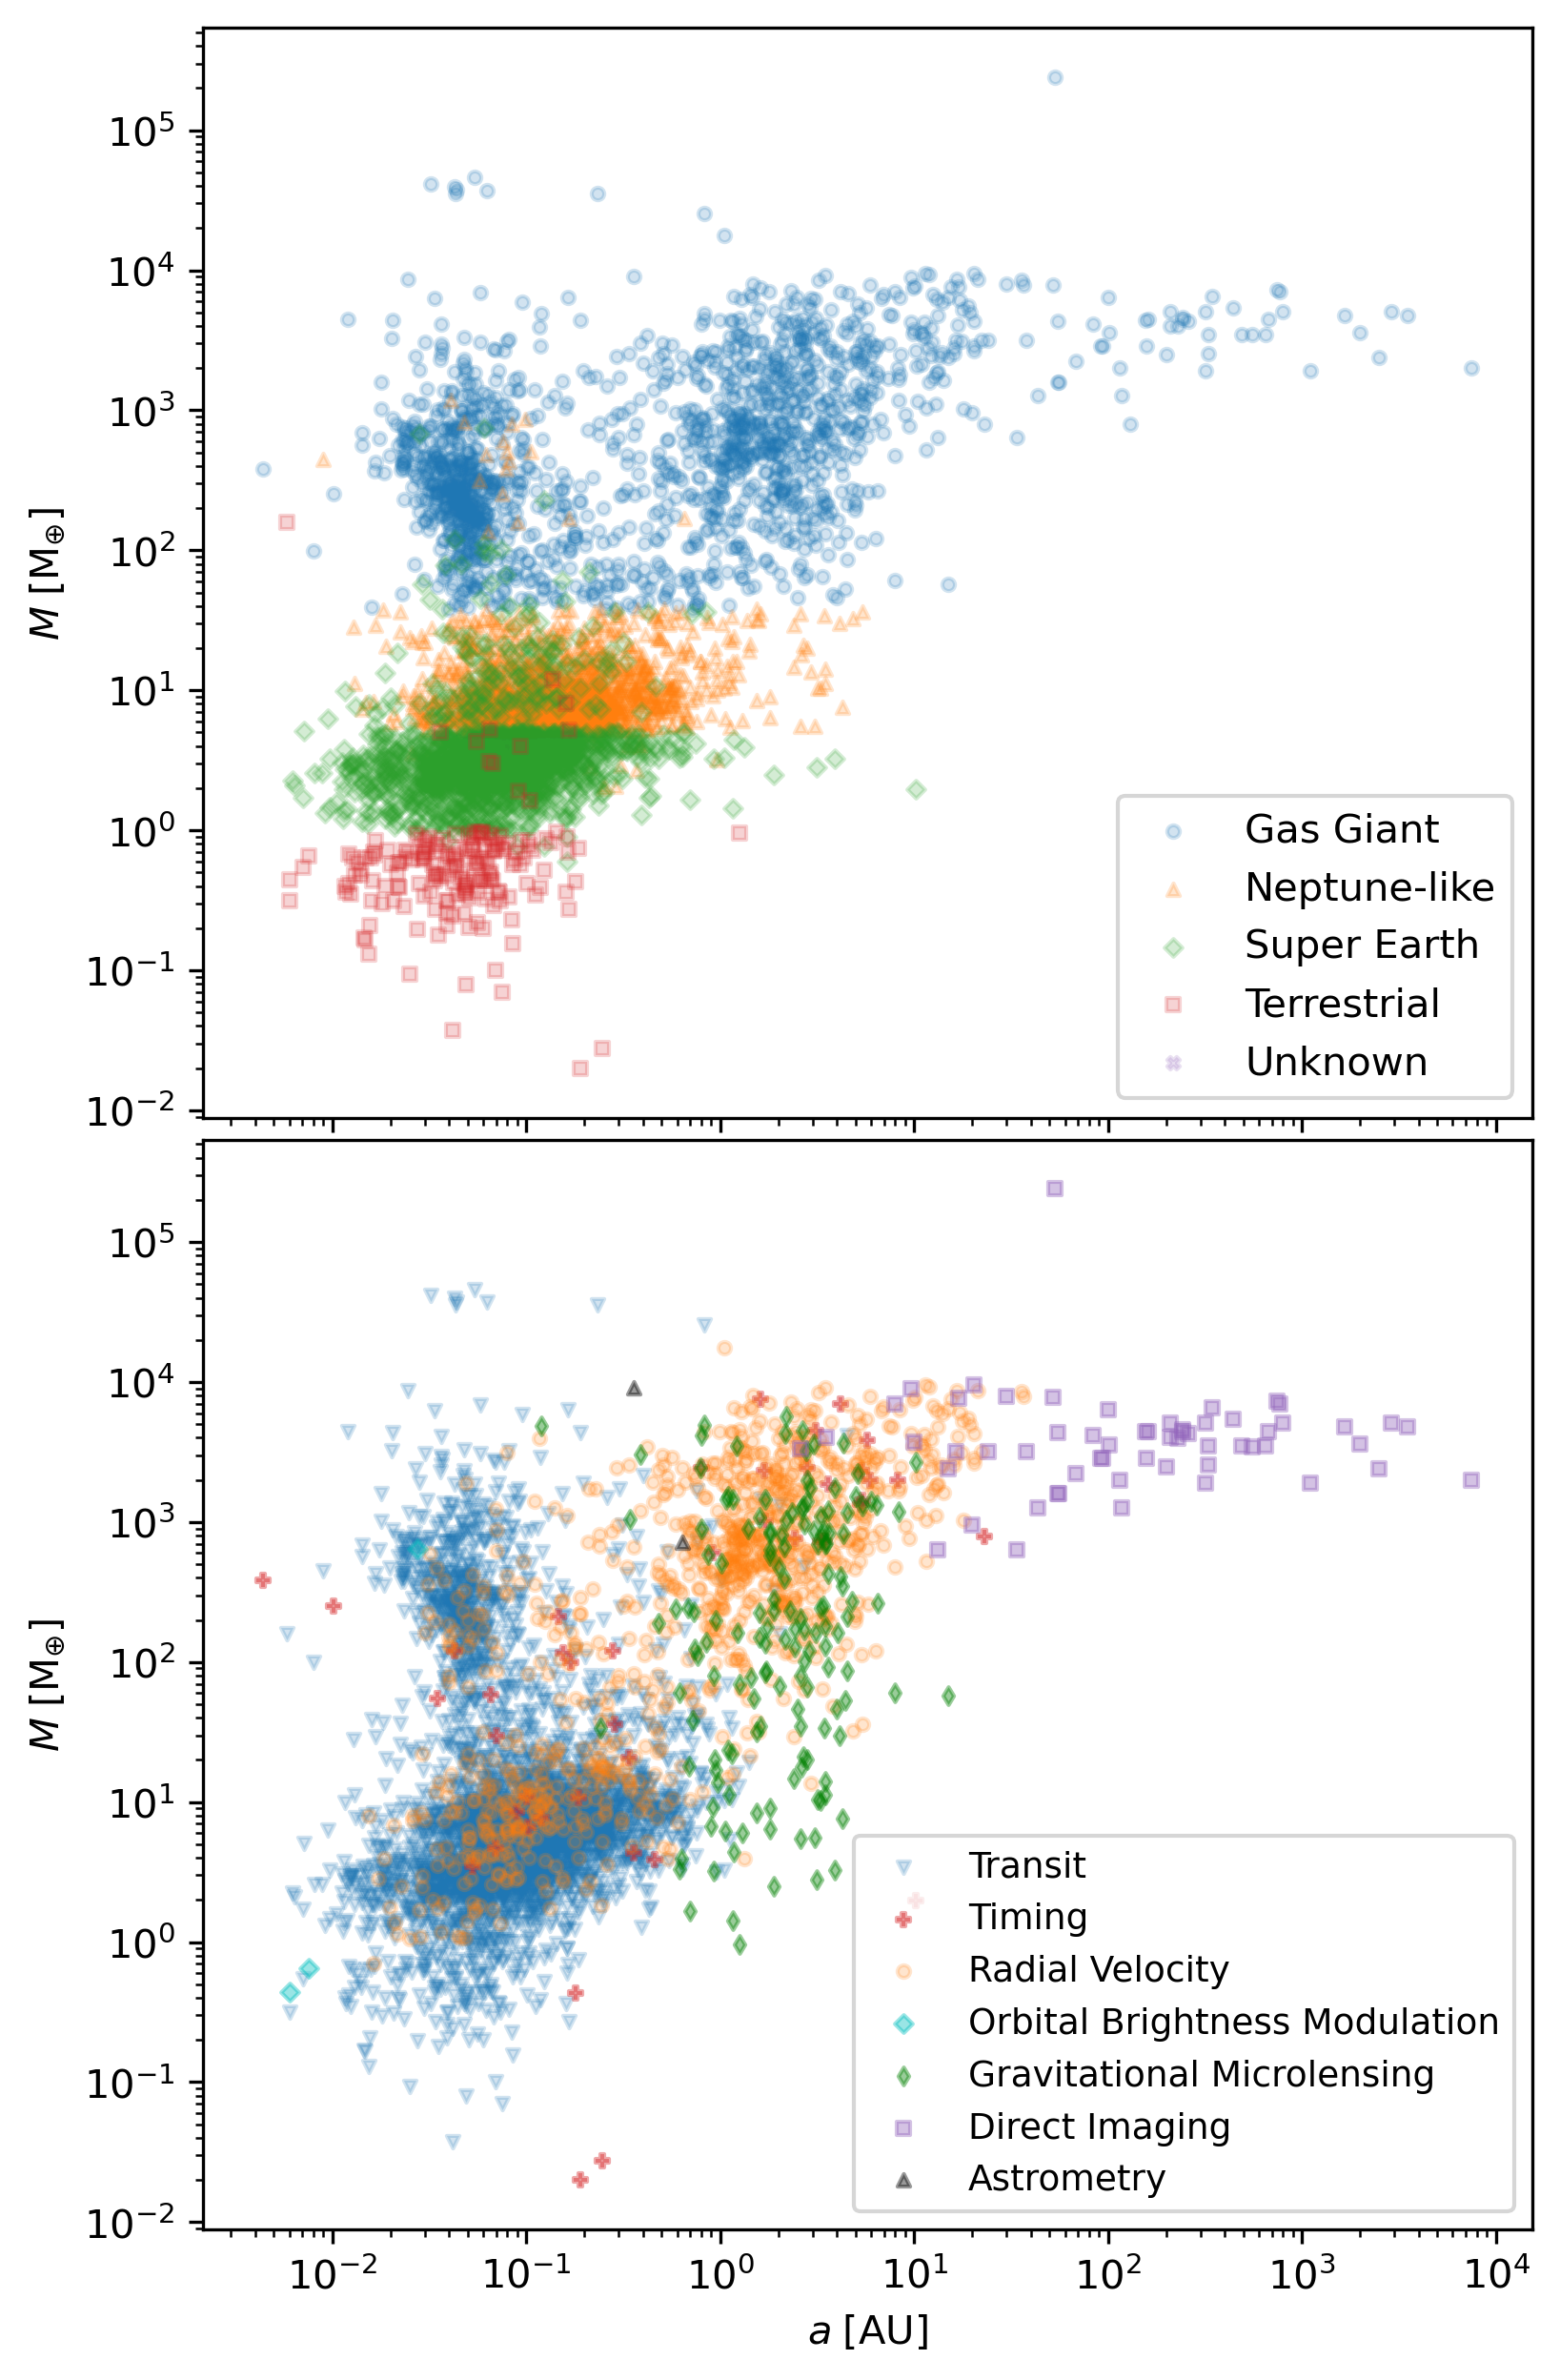

In [173]:
fig,(ax0,ax1) = plt.subplots(nrows=2, dpi=300, figsize=(6,10), sharex=True)
plt.subplots_adjust(hspace=0.02)

ptype_dict = dict(zip( sorted(set(exos['planet_type'])) , ['o','^', 'D', 's', 'X'] ))
for k,v in ptype_dict.items():
    inds = np.where(np.logical_and(~np.isnan(exos['mass_ME']),exos['planet_type']==k))
    ax0.scatter(exos['orbital_radius_AU'][inds],exos['mass_ME'][inds],
                marker=v, alpha=0.2, label=k, s=10)
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax0.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
ax0.legend()

methds = ['Timing']
dummy,counts = np.unique(exos['detection_method'],return_counts=True)
for m in set(exos['detection_method']):
       if not 'Timing' in m and not 'Kinematics' in m:
            methds.append(m)
#it just so happens that the detection methods sort alphabetically are *almost* in decreasing order
# of use, so I'm going to start with a cheat and see if it works
meth_dict=dict(zip(sorted(methds)[::-1], zip(['tab:blue', 'tab:red','tab:orange', 'c',
                                              'g', 'tab:purple', 'k'] ,
                                             ['v','P','o','D','d','s', '^'])))
for k,v in meth_dict.items():
    if k == 'Timing':
        kT = ['Transit Timing Variations','Pulsar Timing','Pulsation Timing Variations',
              'Eclipse Timing Variations']
        inds = np.where(np.logical_and(~np.isnan(exos['mass_ME']),
                                       np.char.find(exos['detection_method'],k)+1))
    else:
        inds = np.where(np.logical_and(~np.isnan(exos['mass_ME']),exos['detection_method']==k))
    
    ax1.scatter(exos['orbital_radius_AU'][inds],exos['mass_ME'][inds],c=v[0],
                marker=v[1], alpha=0.2 if k in ['Transit','Radial Velocity'] else 0.4,
                label=k, s=10)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$a\;[\mathrm{AU}]$')
ax1.set_ylabel(r'$M\;[\mathrm{M}_{\oplus}]$')
ax1.legend(fontsize=9)